## Clustering
#### 2024/02/06
**By Kaylee**

### 1. Feature normalization in k-NN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.1.1
wb = pd.read_csv(r"C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\wdbc.csv", sep=",")
wb

,id,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# 1.1.2
wb.describe()

,id,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# 1.1.3
#assign X and y variable
var_to_exclude = ['diagnosis']
X = wb.drop(columns = var_to_exclude).values
y = wb['diagnosis'].values

# split data into training and validation
from sklearn.model_selection import train_test_split
# I want the test split to be fixed for multiple model fitting in next sections...
random_seed = 42
Xt, Xv, yt, yv = train_test_split(X, y, test_size = 0.2, random_state=random_seed) # 20% and 80% split
print("shape of original dataset :", wb.shape)
print("shape of input - training set", Xt.shape)
print("shape of input - testing set", Xv.shape)
print("shape of output - training set", yt.shape)
print("shape of output - testing set", yv.shape)

shape of original dataset : (569, 32)
shape of input - training set (455, 31)
shape of input - testing set (114, 31)
shape of output - training set (455,)
shape of output - testing set (114,)


In [5]:
# 1.1.4
# How many cancer/non-cancer cases do we have in training data?
print("# of no cancer:", sum(yt == "B")) # no cancer
print("# of cancer:", sum(yt == "M")) # cancer

# of no cancer: 286
# of cancer: 169


**1.1.5**
consider naive model that predicts every case into the majority category
Under what kind of specific conditions can this model overfit? <br>
Naive model predicts every cases into majority category ignoring all features of the data... It shouldn't be directly related to dataset itself since it doesn't predict based on the data. I can still think of conditions where naive models overfit which are small imbalanced datasets where once category dominates the others and the naive model capturing noise in this case.

In [6]:
# 1.1.6
# create naive model based on validation data
print("# of no cancer:", sum(yt == "B")) # no cancer
print("# of cancer:", sum(yt == "M")) # cancer
# majority category is no cancer in training data (fit the model on training data)
yv_hat = ["B"] * len(yv)
# finding accuracy of naive model
count = 0

for i in range (len(yv)):
    if yv[i] == yv_hat[i]:
        count += 1
    
accuracy = count/len(yv_hat)
print("accuracy of the naive model:", accuracy)

# of no cancer: 286
# of cancer: 169
accuracy of the naive model: 0.6228070175438597


**1.2 A simple k-NN model**

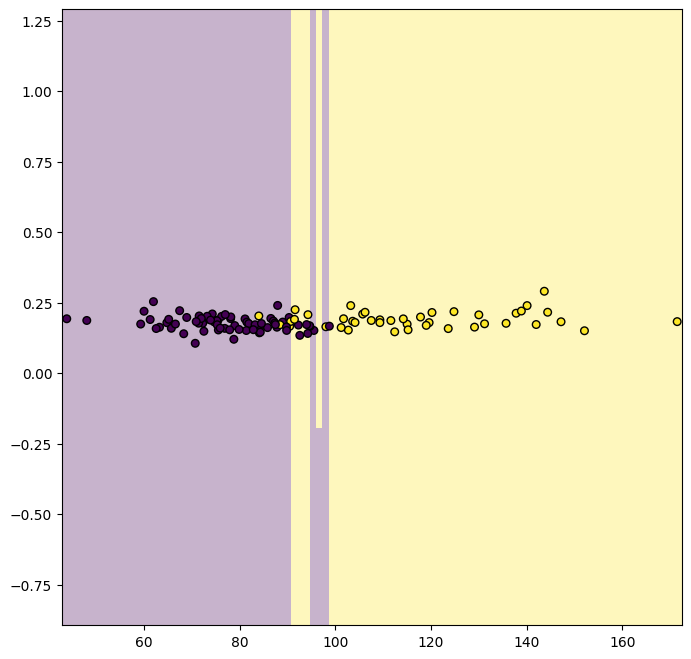

Accuracy on validation data: 0.9035087719298246


In [7]:
# 1.2.1 + 1.2.2 + 1.2.3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

selected_indicies = [3, 9]
X_new = X[:, selected_indicies]
Xt_new = Xt[:, selected_indicies]
Xv_new = Xv[:, selected_indicies]
yt_new = np.where(yt == 'M', 1, 0)
yv_new = np.where(yv == 'M', 1, 0)

# Define the function for plotting decision boundary
def DBPlot(m, Xv_new, yv_new, nGrid=100):
    ## find the extent of the features
    x1_min, x1_max = Xv_new[:, 0].min() - 1, Xv_new[:, 0].max() + 1
    x2_min, x2_max = Xv_new[:, 1].min() - 1, Xv_new[:, 1].max() + 1
    ## make a dense grid (nGrid x nGrid) in this extent
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    ## predict on the grid
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    ## show the predictions as an semi-transparent image
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    ## add the actual data points on the image
    plt.scatter(Xv_new[:,0], Xv_new[:,1], c=yv_new, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

# Define a function to fit the k-NN model, plot decision boundary, and compute accuracy
def fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7):
    # Fit k-NN model
    m = KNeighborsClassifier(n_neighbors=k)
    _ = m.fit(Xt_new, yt_new)
    
    # Plot decision boundary
    DBPlot(m, Xv_new, yv_new)
    
    # Compute accuracy on validation data
    y_hat = m.predict(Xv_new)
    accuracy = accuracy_score(yv_new, y_hat)
    return accuracy
    
# execute code
accuracy = fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7)
print("Accuracy on validation data:", accuracy)

Explanation: The decision doundary plot has vertical stripes since the model is detecting some of the yellow dots within the purple dominant area on the left half side of the plot.

**1.3 Normalize features**

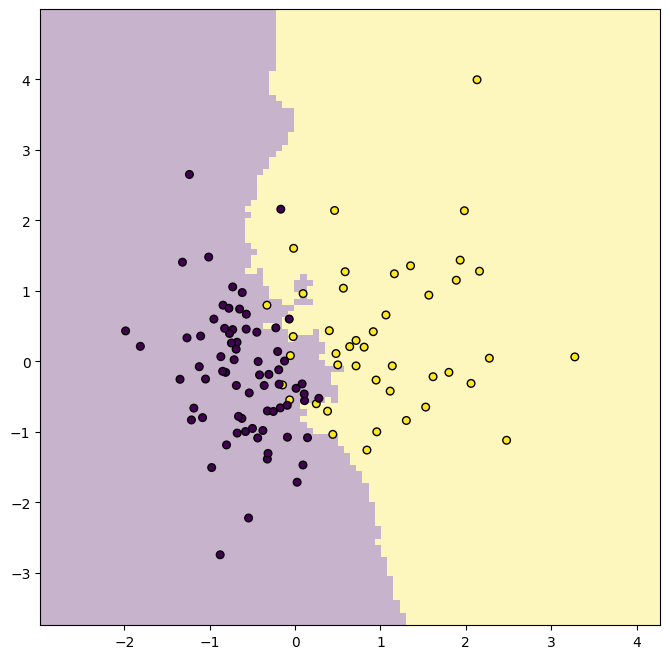

Accuracy on validation data: 0.9298245614035088


In [8]:
# 1.3.1 + # 1.3.2
#normalize two features mannually
texture_mean = X[:, 3]
concpoints_mean = X[:, 9]
norm_texture_mean = (texture_mean - np.mean(texture_mean))/np.std(texture_mean)
norm_concpoints_mean = (concpoints_mean - np.mean(concpoints_mean))/np.std(concpoints_mean)

# stack the two normalized columns
X_new = np.column_stack((norm_texture_mean, norm_concpoints_mean))
# creates the same test split bc I used random_seed, but with normalized X_new input
Xt_new, Xv_new, yt_new, yv_new = train_test_split(X_new, y, test_size = 0.2, random_state=random_seed) # 20% and 80% split
yt_new = np.where(yt == 'M', 1, 0)
yv_new = np.where(yv == 'M', 1, 0)

# Define the function for plotting decision boundary
def DBPlot(m, Xv_new, yv_new, nGrid=100):
    ## find the extent of the features
    x1_min, x1_max = Xv_new[:, 0].min() - 1, Xv_new[:, 0].max() + 1
    x2_min, x2_max = Xv_new[:, 1].min() - 1, Xv_new[:, 1].max() + 1
    ## make a dense grid (nGrid x nGrid) in this extent
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    ## predict on the grid
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    ## show the predictions as an semi-transparent image
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    ## add the actual data points on the image
    plt.scatter(Xv_new[:,0], Xv_new[:,1], c=yv_new, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

# Define a function to fit the k-NN model, plot decision boundary, and compute accuracy
def fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7):
    # Fit k-NN model
    m = KNeighborsClassifier(n_neighbors=k)
    _ = m.fit(Xt_new, yt_new)
    
    # Plot decision boundary
    DBPlot(m, Xv_new, yv_new)
    
    # Compute accuracy on validation data
    y_hat = m.predict(Xv_new)
    accuracy = accuracy_score(yv_new, y_hat)
    return accuracy
    
# execute code
accuracy = fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7)
print("Accuracy on validation data:", accuracy)
# accuracy is better with normalized features.

**1.3.3** <br>
Explain why does the decision boundary plot look different now. *(Accuracy is commented above)*<br>
Since we normalized the feature input to the DBplot, the decision boundary plot looks different now. The reason why we normailze features when plotting decision boundary is becuse it helps ensure that the visualization accurately reflects the relationship between features and classes in the dataset. k-NN model computes distances between data points. If features are not normailized like the original version of graph, feature with larger scales can lead to larger distances, potentially overshadowing the contributions of other features. Normalizing features can improve the convergence of the model by ensuring that distances are computed more uniformly across features. This is why accuracy of the normalized featured model is higher than the original featured model.




**1.4 Other features**

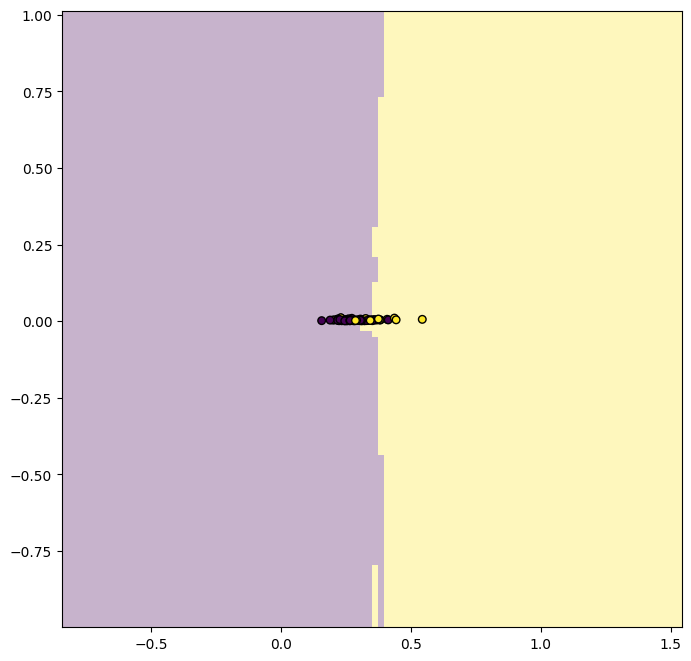

Accuracy on validation data: 0.6842105263157895


In [9]:
# 1.4.1 - non-normalized mode
# two variables - concpoints.worst and symmetry.se
selected_indicies = [29, 20]
X_new = X[:, selected_indicies]
Xt_new = Xt[:, selected_indicies]
Xv_new = Xv[:, selected_indicies]
yt_new = np.where(yt == 'M', 1, 0)
yv_new = np.where(yv == 'M', 1, 0)

# Define the function for plotting decision boundary
def DBPlot(m, Xv_new, yv_new, nGrid=100):
    ## find the extent of the features
    x1_min, x1_max = Xv_new[:, 0].min() - 1, Xv_new[:, 0].max() + 1
    x2_min, x2_max = Xv_new[:, 1].min() - 1, Xv_new[:, 1].max() + 1
    ## make a dense grid (nGrid x nGrid) in this extent
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    ## predict on the grid
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    ## show the predictions as an semi-transparent image
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    ## add the actual data points on the image
    plt.scatter(Xv_new[:,0], Xv_new[:,1], c=yv_new, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

# Define a function to fit the k-NN model, plot decision boundary, and compute accuracy
def fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7):
    # Fit k-NN model
    m = KNeighborsClassifier(n_neighbors=k)
    _ = m.fit(Xt_new, yt_new)
    
    # Plot decision boundary
    DBPlot(m, Xv_new, yv_new)
    
    # Compute accuracy on validation data
    y_hat = m.predict(Xv_new)
    accuracy = accuracy_score(yv_new, y_hat)
    return accuracy
    
# execute code
accuracy = fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7)
print("Accuracy on validation data:", accuracy)

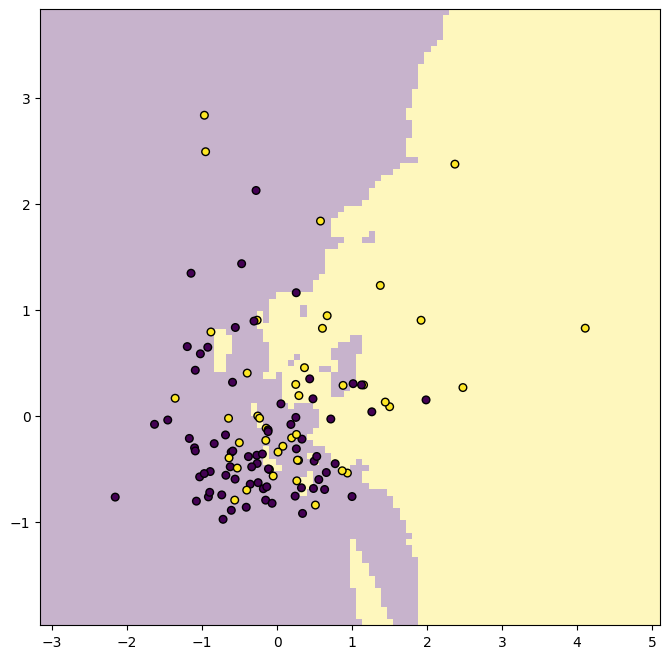

Accuracy on validation data: 0.6666666666666666


In [10]:
# 1.4.1 - normalized mode
#normalize two features mannually
concpoints_worst = X[:, 29]
symmetry_se = X[:, 20]
norm_concpoints_worst = (concpoints_worst - np.mean(concpoints_worst))/np.std(concpoints_worst)
norm_symmetry_se = (symmetry_se - np.mean(symmetry_se))/np.std(symmetry_se)

# stack the two normalized columns
X_new = np.column_stack((norm_concpoints_worst, norm_symmetry_se))
# creates the same test split bc I used random_seed, but with normalized X_new input
Xt_new, Xv_new, yt_new, yv_new = train_test_split(X_new, y, test_size = 0.2, random_state=random_seed) # 20% and 80% split
yt_new = np.where(yt == 'M', 1, 0)
yv_new = np.where(yv == 'M', 1, 0)

# Define the function for plotting decision boundary
def DBPlot(m, Xv_new, yv_new, nGrid=100):
    ## find the extent of the features
    x1_min, x1_max = Xv_new[:, 0].min() - 1, Xv_new[:, 0].max() + 1
    x2_min, x2_max = Xv_new[:, 1].min() - 1, Xv_new[:, 1].max() + 1
    ## make a dense grid (nGrid x nGrid) in this extent
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    ## predict on the grid
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    ## show the predictions as an semi-transparent image
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    ## add the actual data points on the image
    plt.scatter(Xv_new[:,0], Xv_new[:,1], c=yv_new, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

# Define a function to fit the k-NN model, plot decision boundary, and compute accuracy
def fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7):
    # Fit k-NN model
    m = KNeighborsClassifier(n_neighbors=k)
    _ = m.fit(Xt_new, yt_new)
    
    # Plot decision boundary
    DBPlot(m, Xv_new, yv_new)
    
    # Compute accuracy on validation data
    y_hat = m.predict(Xv_new)
    accuracy = accuracy_score(yv_new, y_hat)
    return accuracy
    
# execute code
accuracy = fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7)
print("Accuracy on validation data:", accuracy)
# accuracy is better with non-normalized mode

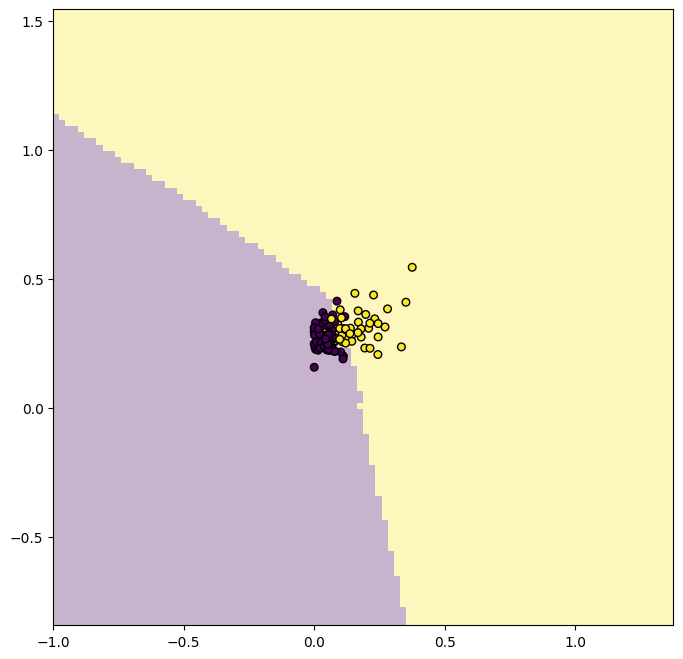

Accuracy on validation data: 0.868421052631579


In [11]:
# 1.4.2 - with a few other pairs of two features and of your choice
# try to pick ones that give good accuracy, non-normalized mode
# two variables - smoothness.se & concpoints.worst
selected_indicies = [7, 29]
X_new = X[:, selected_indicies]
Xt_new = Xt[:, selected_indicies]
Xv_new = Xv[:, selected_indicies]
yt_new = np.where(yt == 'M', 1, 0)
yv_new = np.where(yv == 'M', 1, 0)

# Define the function for plotting decision boundary
def DBPlot(m, Xv_new, yv_new, nGrid=100):
    ## find the extent of the features
    x1_min, x1_max = Xv_new[:, 0].min() - 1, Xv_new[:, 0].max() + 1
    x2_min, x2_max = Xv_new[:, 1].min() - 1, Xv_new[:, 1].max() + 1
    ## make a dense grid (nGrid x nGrid) in this extent
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    ## predict on the grid
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    ## show the predictions as an semi-transparent image
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    ## add the actual data points on the image
    plt.scatter(Xv_new[:,0], Xv_new[:,1], c=yv_new, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

# Define a function to fit the k-NN model, plot decision boundary, and compute accuracy
def fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7):
    # Fit k-NN model
    m = KNeighborsClassifier(n_neighbors=k)
    _ = m.fit(Xt_new, yt_new)
    
    # Plot decision boundary
    DBPlot(m, Xv_new, yv_new)
    
    # Compute accuracy on validation data
    y_hat = m.predict(Xv_new)
    accuracy = accuracy_score(yv_new, y_hat)
    return accuracy
    
# execute code
accuracy = fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7)
print("Accuracy on validation data:", accuracy)

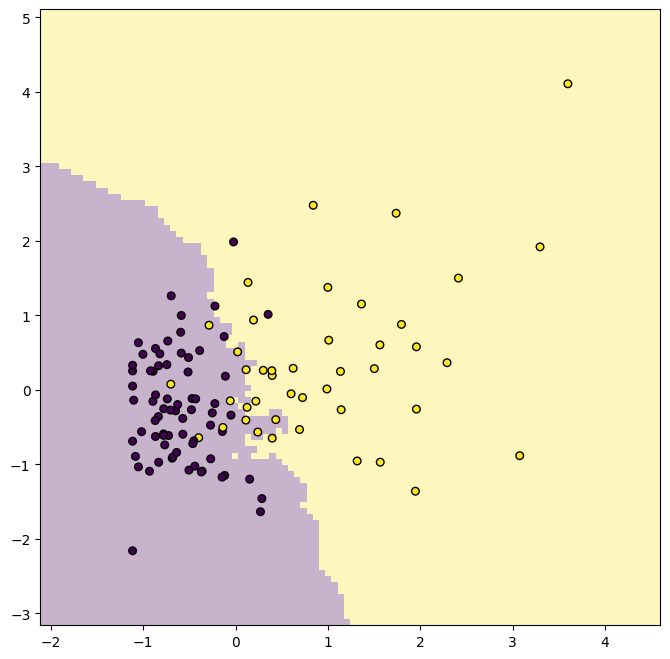

Accuracy on validation data: 0.8771929824561403


In [12]:
# normalized mode: two variables - smoothness.se & concpoints.worst
# normalize two features mannually
compactness_mean = X[:, 7]
concpoints_worst = X[:, 29]
norm_compactness_mean = (compactness_mean - np.mean(compactness_mean))/np.std(compactness_mean)
norm_concpoints_worst = (concpoints_worst - np.mean(concpoints_worst))/np.std(concpoints_worst)

# stack the two normalized columns
X_new = np.column_stack((norm_compactness_mean, norm_concpoints_worst))
# creates the same test split bc I used random_seed, but with normalized X_new input
Xt_new, Xv_new, yt_new, yv_new = train_test_split(X_new, y, test_size = 0.2, random_state=random_seed) # 20% and 80% split
yt_new = np.where(yt == 'M', 1, 0)
yv_new = np.where(yv == 'M', 1, 0)

# Define the function for plotting decision boundary
def DBPlot(m, Xv_new, yv_new, nGrid=100):
    ## find the extent of the features
    x1_min, x1_max = Xv_new[:, 0].min() - 1, Xv_new[:, 0].max() + 1
    x2_min, x2_max = Xv_new[:, 1].min() - 1, Xv_new[:, 1].max() + 1
    ## make a dense grid (nGrid x nGrid) in this extent
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    ## predict on the grid
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(8,8))
    ## show the predictions as an semi-transparent image
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    ## add the actual data points on the image
    plt.scatter(Xv_new[:,0], Xv_new[:,1], c=yv_new, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

# Define a function to fit the k-NN model, plot decision boundary, and compute accuracy
def fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7):
    # Fit k-NN model
    m = KNeighborsClassifier(n_neighbors=k)
    _ = m.fit(Xt_new, yt_new)
    
    # Plot decision boundary
    DBPlot(m, Xv_new, yv_new)
    
    # Compute accuracy on validation data
    y_hat = m.predict(Xv_new)
    accuracy = accuracy_score(yv_new, y_hat)
    return accuracy
    
# execute code
accuracy = fit_knn_model_and_plot(Xt_new, yt_new, Xv_new, yv_new, k=7)
print("Accuracy on validation data:", accuracy)
# accuracy is better with non-normalized mode

**1.4.3**
Normalizing features definately specifies the decision boundary plot diversifying the visualized distributions. However, the higher accuracy on validation data varied between different pairs of features. Sometimes, non-normalized feature model had higher accuracy on validation data, and on others it was the opposite. Overall, the decision boundary plots align with the accuracy validation results. We can see this from the background color distribution and the matching data point colors on DBplot.

### 2. Cluster text

In [13]:
# 2.1.1
am = pd.read_csv(r"C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\amazon-reviews.csv", sep='\t')
am = am.dropna()
am = am.drop(columns = ['date', 'verified', 'summary', 'rating'])
am

,review
0,This handcream has a beautiful fragrance. It d...
1,"wonderful hand lotion, for seriously dry skin,..."
2,"Best hand cream around. Silky, thick, soaks i..."
3,Thanks!!
4,Great hand lotion. Soaks right in and leaves ...
...,...
34273,I like to use moisturizers and sunscreens that...
34274,I wouldn't be able to afford this if not asked...
34275,Did nothing
34276,I love the Oribe bright blonde radiance spray....


In [14]:
import nltk # natural language processing library
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# 2.1.2
np.random.seed(42)

# Select a random sample of size n from the DataFrame
n = 10000
random_sample = am['review'].sample(n)

# Tokenize and print each review in the random sample
for review in random_sample:
    tk = nltk.tokenize.RegexpTokenizer(r"\w+")
    tk.tokenize(str(review).lower())
# the function works just fine! I didn't print out the results since it's too long

In [16]:
# 2.1.3
# printing out some of the randomly selected reviews
from textwrap import wrap
print("\n".join(wrap(review)), "\n")

This is the second BB creme I have tried.  I like the idea around
these cremes, coverage with spf properties along with some skin
brighteners.  The Vichy creme goes on very smoothly and importantly
does not burn my sensitive skin at all.  The color (light) will work
for many light skin tones from porcelain  to a neutral fair tone.  My
skin has some cool undertones and it blended well.  This is
moisturizing.  My face felt hydrated and soft.  These are the best
features along with the spf.  What I did not like was hiw thus sat in
my pores.  This did not minimize them and it sat in fine lines too,
seeming to accentuate them.  This overs minimal coverage so I had to
use a concealer for some uneven tones in my skin.  Overall a good
moosturizer, but I needed to put make up over this product for even
coverage and to reduce the appearance of fine lines. 



In [17]:
# 2.1.4
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer with stop words removed
vrizer = CountVectorizer(stop_words='english')
# Document-Term Matrix (DTM)
_ = vrizer.fit(random_sample)
X = vrizer.transform(random_sample)

In [18]:
X
# sparse matricies
# 10000 reviews contain total of 16329 words

<10000x16329 sparse matrix of type '<class 'numpy.int64'>'
	with 343675 stored elements in Compressed Sparse Row format>

In [19]:
# 2.1.5
# Convert the DTM to a Pandas DataFrame
# one can't directly convert sparse matrix to dataframe so we need toarray()
X_dtf = pd.DataFrame.sparse.from_spmatrix(X, columns=vrizer.get_feature_names_out())
X_dtf.head(5)
# the rows of DTM represents the sample size. So in this case it's number of reviews
# the columns represent words that are in the reviews. 
# the values denote the value count of that column word in each row review

,00,000,01,02,03,04,05,052,0553383302,06,...,zombie,zone,zones,zoo,zoom,zoomed,zooming,zoya,zs,zwilling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**2.2 Compute normalized vectors**

**2.2.1**
Explain why euclidean distance b/w normalized vectors similar to cosine similarity. <br>
I attached each formula on the bottom of this description. As you can see when vectors are normalized, the magnitudes ||u|| & ||v|| becomes 1, so the euclidean distance simplifies to 
sqrt(2 - 2 * dot_product). Likewise, for cosine similarity it simplifies to sum(u[i] * v[i] for i in range(len(u))). The only difference btw the normalized euclidean distance and normalized cosine similarity is sqrt and - sign. They are almost similar except for the fact that high cosine similarity corresponds to a small euclidean distance, and low cosine similarity corresponds to a large euclidean distance. 

In [23]:
# 2.2.1 - adding on
from math import sqrt

# Euclidean Distance
def euclidean_distance(u, v):
    squared_diff = sum((u[i] - v[i]) ** 2 for i in range(len(u)))
    return sqrt(squared_diff)

# Normalized Euclidean Distance
def normalized_euclidean_distance(u, v):
    dot_product = sum(u[i] * v[i] for i in range(len(u)))
    return sqrt(2 - 2 * dot_product)

# Cosine Similarity
def cosine_similarity(u, v):
    dot_product = sum(u[i] * v[i] for i in range(len(u)))
    norm_u = sqrt(sum(ui ** 2 for ui in u))
    norm_v = sqrt(sum(vi ** 2 for vi in v))
    return dot_product / (norm_u * norm_v)

# Simplified Cosine Similarity for Normalized Vectors
def simplified_cosine_similarity(u, v):
    return sum(u[i] * v[i] for i in range(len(u)))

In [37]:
# 2.2.2
# compute euclidean norms of all the review vectors in the DTM
for i in range(len(X_dtf)):
    norm = np.linalg.norm(X_dtf.loc[i])/np.sqrt(len(X_dtf.loc[i]))
    # print(norm)
# the function works just fine:) I commented it bc it's too long if you print all norm

0.046297146854279415
0.024746865930553218
0.127392289384784
0.05190946390488937
0.019168839923972062
0.022134269780316233
0.038337679847944124
0.10322736215216921
0.02928088664536451
0.023476938387411123
0.064531931158276
0.09058840324984205
0.106727583805485
0.06686234983687651
0.060617194262920594
0.02928088664536451
0.007825646129137042
0.08132650018632043
0.02710883339544014
0.015651292258274083
0.16377864010380952
0.10528330094684739
0.011067134890158117
0.015651292258274083
0.09836684654638195
0.017498676712608522
0.02928088664536451
0.011067134890158117
0.07424059779165965
0.022134269780316233
0.04495491443846556
0.02928088664536451
0.10143196672087271
0.08094911299833432
0.05249603013782557
0.08094911299833432
0.0575065197719162
0.06405567423482479
0.011067134890158117
0.13047959602978834
0.025954731952444684
0.08500827610262633
0.030308597131460297
0.05697156377474038
0.02710883339544014
0.03753048039640558
0.060617194262920594
0.03130258451654817
0.01355441669772007
0.0762749

KeyboardInterrupt: 

**2.2.3** <br>
certain norms are 0.... How can it be so? <br>
euclidean norm can be zero when all the components of the vectors are zero. It means that in the review there were no words that are listed in the column.

In [38]:
# 2.2.4
from sklearn.preprocessing import normalize
# Replace the original vectors with normalized vectors
X = normalize(X, norm='l2', axis=1) # use euclidean norm 
X

<10000x16329 sparse matrix of type '<class 'numpy.float64'>'
	with 343675 stored elements in Compressed Sparse Row format>

**2.3 Cluster the Reviews**

In [39]:
# 2.3.1 + 2.3.2
# use k-means clustering to cluster your reviews using cosine similarity. 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
# split the reviews in to 2 clusters - kmeans
km = KMeans(n_clusters=2, random_state=42)
km.fit(X)
# get cluster labels for each review
cluster_labels = km.labels_

max_length = 200 # Maximum number of characters to display for each review

# Print out a set of reviews from each cluster with limited length
for cluster_id in range(2):
    print(f"Cluster {cluster_id} reviews:")
    cluster_indices = np.where(cluster_labels == cluster_id)[0][:5]  # Print first 3 reviews
    for idx in cluster_indices:
        review_text = random_sample.iloc[idx]
        if len(review_text) > max_length:
            truncated_text = review_text[:max_length]
        else:
            truncated_text = review_text
        print("\n".join(wrap(truncated_text)), "\n")
    print("\n")

Cluster 0 reviews:
Essie NP- Partner In Crime is a great fall color! It is not as light
as it looks in the bottle. People have asked if it was maroon or black
on my nails more often than asking if it was brown. But when 

LOVE this color. It actually is the same color as the picture on the
computer which was thrilling and shocking. 

The color of this is gorgeous however the size of the bottle is very
very small. Pretty pricey considering how small the bottle is. 

LOVE OPI! 

Love Love these products. 



Cluster 1 reviews:
I love almost of Mustela's products because they work so well. So this
isn't the first of their products that I have tried, and it certainly
won't be the last. Their products aren't organic, but they 

I absolutely adore this shower gel. It is as gentle on the skin as a
baby product, but gets the job done for an adult. It lathers up very
nicely and keeps my skin soft and glowing. I step out of the s 

So happy I purchased this! Smells so good! Its the real thing. 


comment on results: <br> 
* cluster 0 review seems to be related to nail products. There are some reviews that you can't exactly tell if it's talking about nail products, but it mentions about the color or bottle which reminds me of nail products like manicures.
* cluster 1 seems to be facial & body care product reviews. There is one shampoo review among the five tho. Most of the reviews mention how good the product smells. The shampoo review showed that the customer didn't like the product, but overall the cluster seems to be related to shower related products.

In [41]:
# 2.3.3
# Experiment with different k values
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Cluster the reviews into 2 clusters
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(X)

# Get cluster labels for each review
cluster_labels = kmeans.labels_

max_length = 180  # Maximum number of characters to display for each review

# Print out a set of reviews from each cluster with limited length
for cluster_id in range(15, 2, -3):
    print(f"Cluster {cluster_id} reviews:")
    cluster_indices = np.where(cluster_labels == cluster_id)[0][:3]  # Print first 3 reviews
    for idx in cluster_indices:
        review_text = random_sample.iloc[idx]
        if len(review_text) > max_length:
            truncated_text = review_text[:max_length]
        else:
            truncated_text = review_text
        print("\n".join(wrap(truncated_text)), "\n")
    print("\n")

Cluster 15 reviews:


Cluster 12 reviews:
I love almost of Mustela's products because they work so well. So this
isn't the first of their products that I have tried, and it certainly
won't be the last. Their products aren' 

my girlfriend steals my face buff all the time cause its better and
cooler 

L'Occitane is one of my wife's favorite skin care brands, and is
always high quality, so I jumped at the chance to review this.  The
first thing that I noticed is that one pump get 



Cluster 9 reviews:
So happy I purchased this! Smells so good! Its the real thing. 

Good 

J.A. Heckles makes lots of sharp things, some of the best kitchen
knives (although those are under the 'Henckles' name, the J.A.
Henckels are the lower line).  This nose and ear ha 



Cluster 6 reviews:
LOVE OPI! 

Love Love these products. 

I love Essie polishes. Essie products are very consistent in the
quality. It goes on smoothly and dries very fast. 



Cluster 3 reviews:
Essie NP- Partner In Crime is a great fa

**2.3.4** <br>
Cluster reviews: <br>
* cluster 12 is reviews about skincare products.
* I am not sure what cluster 9 reviews are about since the first two reviews are really short and not too specific... I can tell that review three is about kitchen product, but review two mentioned about smell so I would say that cluster 9 might be related to something in the kitchen either an equipment or ingredients.
* cluster 6 seems to be nail related product reviews
* cluster 3 seems to be also a nail/cosmetics related product review.
Overall: With larger k value, each cluster seems to have more similar or specified reviews on certain category. The reviews are now more likely to be within the same boundary of products.

**3. Images: Reduce number of colors**

cluster colors within images!
clustering can be used to reduce the number of colors, 
e.g. convert a color image to a two-color one, or to a 4-color one

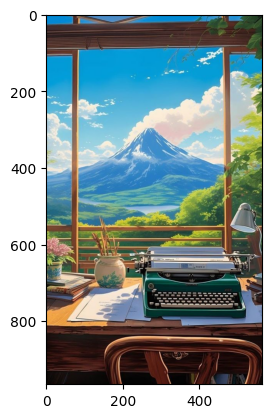

In [58]:
# 3.1
import matplotlib.pyplot as plt
from matplotlib.image import imread
pixels = imread(r"C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\image.jpg")
ax = plt.axes()
ax.set_aspect("equal")
_ = plt.imshow(pixels)
_ = plt.show()

In [59]:
pixels.shape # there are three color channels in pixels above!

(965, 564, 3)

(544260, 3)
center color values:
 [[199.65027981 206.94088104 203.89915339]
 [ 69.11089891  40.45865393  33.37623726]
 [ 68.80524995 116.5342598  133.38087885]
 [131.84367308 119.96579212  83.73039271]
 [ 11.63542065 155.7950304  213.85501424]
 [171.64294518 180.5713915   75.58319818]
 [238.50399336 232.05038017 218.89582135]
 [ 26.6729171   12.17535909   9.99490784]
 [ 60.27980627  86.50096615  60.39772642]
 [107.58880529  70.93428884  52.04859292]
 [ 83.89088334 171.15371719 210.31671291]
 [ 13.15167143  48.64297254  44.32266683]
 [122.7331941  147.67768395 160.91261842]
 [220.11009717 175.80545553 118.03808021]
 [144.18133333 197.84808205 218.52443077]
 [ 57.45437206 136.72827401 188.68077905]]


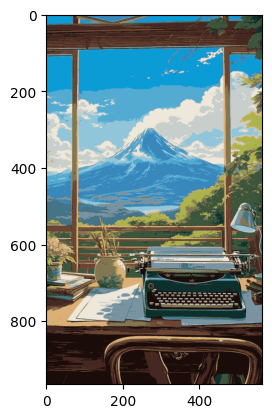

In [60]:
# 3.1 adding on
M = pixels.reshape((-1, pixels.shape[2]))
print(M.shape)
# 3 (or 4) columns, one for each color channel
# (544260, 3)

from sklearn.cluster import KMeans

m = KMeans(16).fit(M) # cluter the color values
cl = m.predict(M) # find the cluster id for each pixel
centers = m.cluster_centers_ # find the cluster centeres (i.e. colors)
print("center color values:\n", centers)

compressed = centers[cl]/255 # normalize to between 0 and 1
compressed = compressed.reshape(pixels.shape)
# make it back to NxM array
ax_new = plt.axes()
ax_new.set_aspect("equal")
_ = plt.imshow(compressed)
_ = plt.show()

**3.2**
(a) the shape of pixels represent dimensions of the picture for the first two numbers (965, 564 and ,3) which is the last number representing the color channels used in the pixel.<br>
(b) Matrix M is reshaping the original picture using M = pixels.reshape((-1, pixels.shape[2])). M represents a new array with a shape of (699*960, 3), where each row represents a pixel in the image and each column represents a color channel.<br>
(c) 'cl' represents the cluster assignments for each pixel after applying KMeans clustering on the color values of the image. cl[12345] = 2 means that the pixel at indesx 12345 has been assigned to cluster 2. <br>
(d) It represents the centroid of clusters obtained after KMeans clustering. Each centriod represents a color in the color space. first row, second column value 163.37 represents that the row has value 163.37 for certain channel(e.g. red, green, or blue). <br>
(e) Since we assinged 16 to the k value when training on KMeans clustering, there will be 16 center color values, each representing the center of one of the clusters.

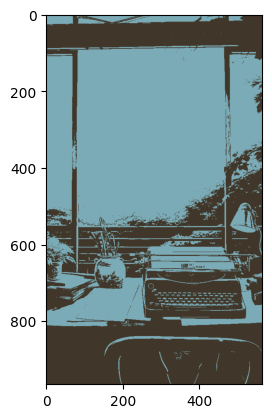

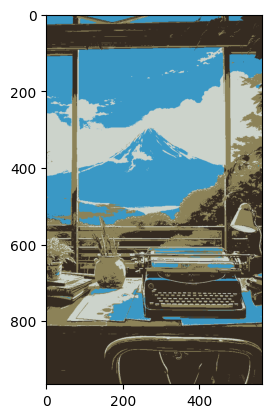

In [62]:
# 3.3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def compress_image(pixels, num_colors):
    M = pixels.reshape((-1, pixels.shape[2]))
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(M)
    cl = kmeans.predict(M)
    centers = kmeans.cluster_centers_

    # compress image using the cluster centers
    compressed = centers[cl] / 255
    compressed = compressed.reshape(pixels.shape)

    # display compressed image
    plt.imshow(compressed)
    plt.show()

pixels = imread(r"C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\image.jpg")

compress_image(pixels, 2)  # Compress with 2 colors
compress_image(pixels, 4)  # Compress with 4 colors